In [2]:
import tensorflow as tf
import MnasNet
import numpy as np
import pandas as pd
# sys.path로 확인
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('MnasNet_exp.ipynb'))))))))
from EasyFree.PACK import FileManager

In [3]:
sys.path

['c:\\Users\\svsta\\EasyFree\\MODEL\\MnasNet',
 'c:\\Users\\svsta\\.vscode\\extensions\\ms-python.python-2020.9.114305\\pythonFiles\\vscode_datascience_helpers\\..\\.does-not-exist',
 'c:\\Users\\svsta\\.vscode\\extensions\\ms-python.python-2020.9.114305\\pythonFiles',
 'c:\\Users\\svsta\\.vscode\\extensions\\ms-python.python-2020.9.114305\\pythonFiles\\lib\\python',
 'C:\\Users\\svsta\\anaconda3\\python37.zip',
 'C:\\Users\\svsta\\anaconda3\\DLLs',
 'C:\\Users\\svsta\\anaconda3\\lib',
 'C:\\Users\\svsta\\anaconda3',
 '',
 'C:\\Users\\svsta\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\svsta\\anaconda3\\lib\\site-packages',
 'C:\\Users\\svsta\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\svsta\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\svsta\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\svsta\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\svsta\\.ipython',
 'c:\\Users\\svsta']

예제 데이터

In [4]:
mnist = tf.keras.datasets.mnist
# Load Mnist data
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# Preprocess data
x_train, x_test = x_train / 127.5 - 1, x_test / 127.5 - 1
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [5]:
x_train.shape

(60000, 28, 28, 1)

수집 데이터

In [47]:
coco_file = pd.read_csv(r'C:\Users\svsta\EasyFree\IMAGE\coco_file.csv')[['image_name','category']]

In [8]:
coco_file

,image_name,category
0,AC_95_17,6000096190
1,AC_95_18,6000096190
2,AC_95_19,6000096190
3,AC_95_25,6000096190
4,AC_95_26,6000096190
...,...,...
289,AC_99_995,6000096236
290,AC_99_996,6000096236
291,AC_99_997,6000096236
292,AC_99_998,6000096236


In [9]:
from PIL import Image

In [10]:
image_data = []
target_data = []
for img_source in FileManager.File_Search(r'C:\Users\svsta\EasyFree\IMAGE\Trans_Image','.png'):
    target_data.append(coco_file[coco_file['image_name'] == img_source.split('\\')[-1].split('.')[0]]['category'])
    image_data.append(np.array(Image.open(img_source)))

In [11]:
target_data = list(map(lambda i : i.values[0], target_data))

In [12]:
target_dict = {}
dict_number = 0
for i in list(set(target_data)):
    target_dict[i] = dict_number
    dict_number+=1

In [46]:
target_dict

{6000096160: 0,
 6000096009: 1,
 6000096010: 2,
 6000096234: 3,
 6000096235: 4,
 6000096236: 5,
 6000096174: 6,
 6000096175: 7,
 6000096237: 8,
 6000095797: 9,
 6000096222: 10,
 6000096191: 11,
 6000096219: 12,
 6000096220: 13,
 6000096189: 14,
 6000096190: 15,
 6000096159: 16}

In [13]:
target_data = list(map(lambda i : target_dict[i], target_data))

In [14]:
image_data = list(map(lambda i : i[:,:,0:3], image_data))

In [15]:
image_data = np.asarray(image_data)

In [16]:
target_data = np.asarray(target_data)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, target_data)

In [18]:
X_train, X_test = X_train / 127.5 - 1, X_test / 127.5 - 1

In [20]:
# Load model
model = MnasNet.MnasNet(input_shape=X_train[0].shape)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

                   
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 28, 28, 120)  480         depthwise_conv2d_6[0][0]         
__________________________________________________________________________________________________
re_lu_14 (ReLU)                 (None, 28, 28, 120)  0           batch_normalization_19[0][0]     
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 28, 40)   4800        re_lu_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 28, 28, 40)   160         conv2d_13[0][0]                  
__________________________________________________________________________________________________
add_3 (Add)                     (None, 28, 28, 40)   0           add_2[0][0]             

In [22]:
# Train it
model.fit(X_train, y_train, epochs=20, batch_size=16)

Epoch 1/20
14/14 [==============================] - 5s 326ms/step - loss: 5.4852 - accuracy: 0.1909
Epoch 2/20
14/14 [==============================] - 3s 243ms/step - loss: 3.7843 - accuracy: 0.3591
Epoch 3/20
14/14 [==============================] - 3s 242ms/step - loss: 3.6831 - accuracy: 0.3727
Epoch 4/20
14/14 [==============================] - 3s 246ms/step - loss: 3.2838 - accuracy: 0.4318
Epoch 5/20
14/14 [==============================] - 3s 245ms/step - loss: 3.0025 - accuracy: 0.6000
Epoch 6/20
14/14 [==============================] - 3s 244ms/step - loss: 2.9357 - accuracy: 0.5909
Epoch 7/20
14/14 [==============================] - 3s 244ms/step - loss: 3.0809 - accuracy: 0.5682
Epoch 8/20
14/14 [==============================] - 3s 244ms/step - loss: 2.7972 - accuracy: 0.6045
Epoch 9/20
14/14 [==============================] - 3s 243ms/step - loss: 2.8016 - accuracy: 0.5727
Epoch 10/20
14/14 [==============================] - 3s 245ms/step - loss: 2.5555 - accuracy: 0.6545

In [32]:
# Evaluate it
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy of: ' + str(acc*100.) + '%')

3/3 [==============================] - 0s 49ms/step - loss: 5.5518 - accuracy: 0.0946
Accuracy of: 9.459459781646729%


In [48]:
# Image.fromarray(X_test[0].shape)

In [38]:
pic = Image.open(r"C:\Users\svsta\EasyFree\IMAGE\Trans_Image\AC_95_17.png")

In [39]:
pic.putdata(X_test[0].shape)

In [44]:
model.predict(X_test)[0].argmax()

14

In [45]:
y_test[0]

3

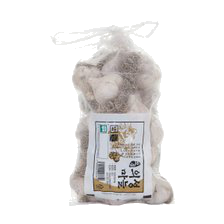

In [40]:
pic